In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
df_sample = df_sample.reset_index(drop=True)

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [4]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.998743
1    0.001257
Name: isFraud, dtype: float64


In [5]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.2, random_state=0)

#Downsample via RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

#Application of the resampling methods
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [6]:
from imblearn.under_sampling import TomekLinks

#Resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_resampled, y_resampled)

In [7]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [8]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [9]:
# import the necessary libraries
import pandas as pd
import numpy as np
# convert X_test to a pandas dataframe
X_test = pd.DataFrame(X_test, columns=X_train.columns)
# define a function to replace outliers with MAD for a single column
def replace_outliers_with_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    threshold = 2.5 * mad
    column[np.abs(column - median) > threshold] = median
    return column

# apply the function to all columns of X_train_resampled_final
for i in range(X_train_resampled_final.shape[1]):
    X_train_resampled_final.iloc[:, i] = replace_outliers_with_mad(X_train_resampled_final.iloc[:, i])

# apply the function to all columns of X_test
for i in range(X_test.shape[1]):
    X_test.iloc[:, i] = replace_outliers_with_mad(X_test.iloc[:, i])

# convert the numpy arrays back to pandas dataframes
X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# print the modified dataframes
print(X_train_resampled_final)
print(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


        step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        403   12378.330000   77000.730000             0.0            0.00   
1        138   44423.330000   50090.000000             0.0        82120.22   
2        325  143673.480000    4564.000000             0.0        82120.22   
3        308  300712.340000   51474.000000             0.0        82120.22   
4        349   47243.760000   11262.000000             0.0            0.00   
...      ...            ...            ...             ...             ...   
406078   278  111168.880136  111168.880136             0.0        82120.22   
406079   274  143673.480000   50090.000000             0.0        82120.22   
406080    60  143673.480000   50090.000000             0.0            0.00   
406081   449   44882.356239   44882.356239             0.0            0.00   
406082   220   39953.091459   29059.334627             0.0        82120.22   

        newbalanceDest  isFlaggedFraud  type  nameDest  nameOri

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [10]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(X_train_resampled_final)
X_train_resampled_final = model.transform(X_train_resampled_final)

In [11]:
# compute required values
scaler = StandardScaler()
model = scaler.fit(X_test)
X_test = model.transform(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6346/6346 [==============================] - ETA: 0s - loss: 0.4569WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002820BEC8C18> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the 

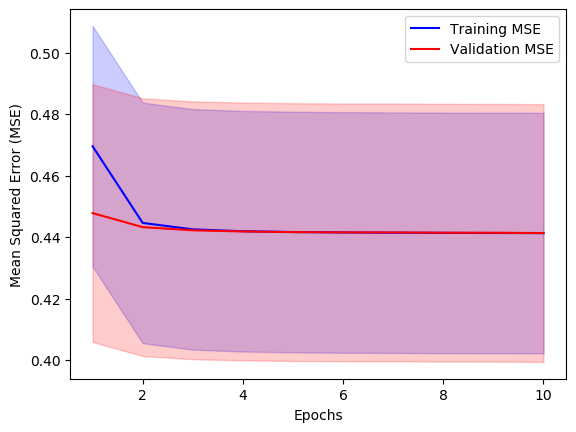

In [12]:
import numpy as np
from keras.models import Model
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Input, Dense

# Set random seed for reproducibility
np.random.seed(42)

# Define the autoencoder architecture
input_dim = X_train_resampled_final.shape[1]
encoding_dim = 15
decoding_dim = 10

input_layer = Input(shape=(input_dim,))
hidden_layer = Dense(encoding_dim, activation='tanh', kernel_regularizer=regularizers.l1(0.000391))(input_layer)
output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# Define the optimizer with the desired learning rate
opt = Adam(lr= 0.00087)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder model with the specified optimizer and loss function
autoencoder.compile(optimizer=opt, loss='mse')

import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits)

# Define lists to store the MSE of training and validation sets for each fold
train_mse = []
val_mse = []
test_mse = []
recon_errors = []

# Loop over each fold
for train_index, val_index in kf.split(X_train_resampled_final):
    
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
    # Define early stopping to prevent overfitting and improve efficiency
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Fit the autoencoder on the training set for the current fold
    history = autoencoder.fit(X_train_fold, X_train_fold, epochs=10,batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
    # Append the MSE of training and validation sets for the current fold to the lists
    train_mse.append(history.history['loss'])
    val_mse.append(history.history['val_loss'])
    
    # compute the reconstruction error for the test data
    recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    recon_errors.append(recon_error)
    
    # Calculate the MSE for the test set
    test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    test_mse.append(test_error)
    print(f"Test MSE: {test_error:.5f}")

# Calculate the mean and standard deviation of MSE for training and validation sets across all folds
mean_train_mse = np.mean(train_mse, axis=0)
std_train_mse = np.std(np.concatenate(train_mse), axis=0)
mean_val_mse = np.mean(val_mse, axis=0)
std_val_mse = np.std(np.concatenate(val_mse), axis=0)

# Plot the MSE of training and validation sets against the number of epochs
epochs = range(1, len(mean_train_mse)+1)
plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [13]:
# import numpy as np
# from keras.models import Model
# from keras import regularizers
# from keras.optimizers import Adam
# from keras.layers import Input, Dense

# # Set random seed for reproducibility
# np.random.seed(42)

# # Define the autoencoder architecture
# input_dim = X_train_resampled_final.shape[1]
# encoding_dim = 32
# decoding_dim = 10

# input_layer = Input(shape=(input_dim,))
# hidden_layer = Dense(encoding_dim, activation='tanh', kernel_regularizer=regularizers.l1(0.00991))(input_layer)
# output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# # Define the optimizer with the desired learning rate
# opt = Adam(lr= 0.00087)

# # Define the autoencoder model
# autoencoder = Model(inputs=input_layer, outputs=output_layer)

# # Compile the autoencoder model with the specified optimizer and loss function
# autoencoder.compile(optimizer=opt, loss='mse')

# import matplotlib.pyplot as plt
# from keras.callbacks import EarlyStopping
# from sklearn.model_selection import KFold

# # Define the number of folds for cross-validation
# n_splits = 5
# kf = KFold(n_splits=n_splits)

# # Define lists to store the MSE of training and validation sets for each fold
# train_mse = []
# val_mse = []
# test_mse = []
# recon_errors = []

# # Loop over each fold
# for train_index, val_index in kf.split(X_train_resampled_final):
    
#     # Split the data into training and validation sets for the current fold
#     X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
#     # Define early stopping to prevent overfitting and improve efficiency
#     early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#     # Fit the autoencoder on the training set for the current fold
#     history = autoencoder.fit(X_train_fold, X_train_fold, epochs=10,batch_size=32, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
#     # Append the MSE of training and validation sets for the current fold to the lists
#     train_mse.append(history.history['loss'])
#     val_mse.append(history.history['val_loss'])
    
#     # compute the reconstruction error for the test data
#     recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
#     recon_errors.append(recon_error)
    
#     # Calculate the MSE for the test set
#     test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
#     test_mse.append(test_error)
#     print(f"Test MSE: {test_error:.5f}")

# # Calculate the mean and standard deviation of MSE for training and validation sets across all folds
# mean_train_mse = np.mean(train_mse, axis=0)
# std_train_mse = np.std(np.concatenate(train_mse), axis=0)
# mean_val_mse = np.mean(val_mse, axis=0)
# std_val_mse = np.std(np.concatenate(val_mse), axis=0)

# # Plot the MSE of training and validation sets against the number of epochs
# epochs = range(1, len(mean_train_mse)+1)
# plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
# plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
# plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
# plt.fill_between(epochs, mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
# plt.xlabel('Epochs')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.legend()
# plt.show()

In [14]:
# Generate reconstructed outputs for the test set
reconstructed = autoencoder.predict(X_test)

# Calculate the MSE between the input and the reconstructed output for each data point
recon_errors = np.mean(np.power(X_test - reconstructed, 2), axis=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2188/2188 [==============================] - 3s 1ms/step


In [15]:
test_mse_fold = np.mean(recon_errors)
test_mse.append(test_mse_fold)

In [16]:
# Print the final mean and standard deviation of reconstruction error across all folds
print(f"Mean Reconstruction Error: {np.mean(test_mse):.5f}")

Mean Reconstruction Error: 0.42983


In [17]:
mse = autoencoder.evaluate(X_test, X_test)
print('Mean squared error on test data:', mse)

2188/2188 [==============================] - 3s 1ms/step - loss: 0.4300
Mean squared error on test data: 0.42999666929244995


In [18]:
mean_train_mse_avg = np.mean(mean_train_mse)
print("Mean Train MSE (Average):", mean_train_mse_avg)

Mean Train MSE (Average): 0.4446933075785637


In [19]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


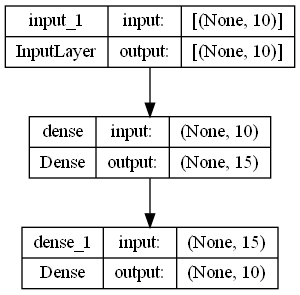

In [20]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder_last.png', show_shapes=True)

In [21]:
# Define the hidden layer model
hidden_layer_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train = hidden_layer_model.predict(X_train_resampled_final)

# Define a new model that takes the output of the hidden layer as input
new_model_input = Input(shape=(hidden_layer_output_train.shape[1],))
x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.000111))(new_model_input)
# x = Dense(32, activation='relu')(x)
output = Dense(2, activation='sigmoid')(x)
#output = Dense(1, activation='softmax')(x)
mediator_network = Model(inputs=new_model_input, outputs=output)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12691/12691 [==============================] - 15s 1ms/step


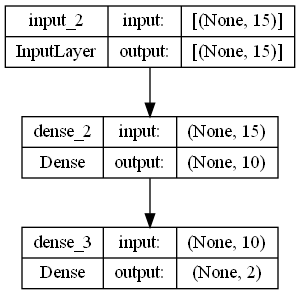

In [22]:
from keras.utils import plot_model
plot_model(mediator_network , to_file='mediator_network .png', show_shapes=True)

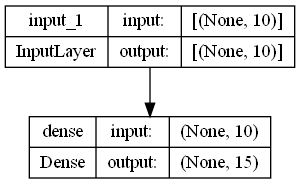

In [23]:
from keras.utils import plot_model
plot_model(hidden_layer_model, to_file='autoencoder_last.png', show_shapes=True)

In [24]:
hidden_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 15)                165       
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


In [25]:
mediator_network.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 2)                 22        
                                                                 
Total params: 182
Trainable params: 182
Non-trainable params: 0
_________________________________________________________________


In [26]:
from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_train_resampled_final_onehot = to_categorical(y_train_resampled_final)

In [28]:
opt_new = Adam(lr= 0.000992)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#Compile the new model
mediator_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# Train the new model on the activations of the hidden layer
history = mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot,
                               epochs=15, batch_size=32, validation_split=0.1,
                               callbacks=[early_stopping])

# Train the new model on the activations of the hidden layer
#history=mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot, epochs=10, batch_size=32,validation_split=0.2)

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
11418/11422 [============================>.] - ETA: 0s - loss: 0.3813WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000028209C25558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

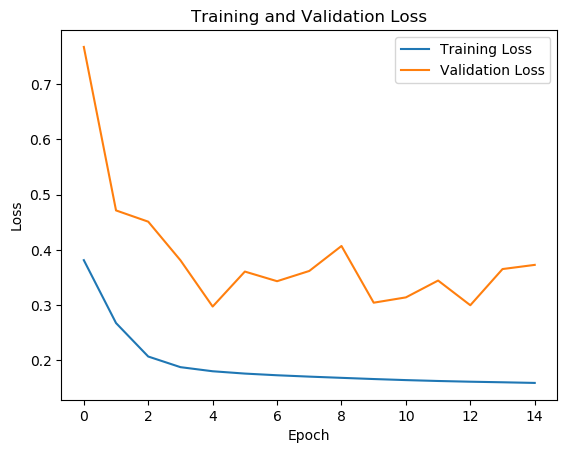

In [30]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
train_loss_mean = sum(history.history['loss']) / len(history.history['loss'])
val_loss_mean = sum(history.history['val_loss']) / len(history.history['val_loss'])

print("Train Loss Mean:", train_loss_mean)
print("Validation Loss Mean:", val_loss_mean)

Train Loss Mean: 0.19227861563364665
Validation Loss Mean: 0.38932014306386314


In [32]:
print(y_train_resampled_final)

0         0
1         0
2         0
3         0
4         0
         ..
406078    1
406079    1
406080    1
406081    1
406082    1
Name: isFraud, Length: 406083, dtype: int64


## Create the agent

In [33]:
# Define the hidden layer model
hidden_layer_model_med = Model(inputs=mediator_network .input, outputs=mediator_network .layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = Input(shape=(hidden_layer_output_train_med.shape[1],))
x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.0000611))(new_model_input_med)
# x = Dense(32, activation='relu')(x)
output_med = Dense(2, activation='sigmoid')(x)
#output = Dense(1, activation='softmax')(x)
agent_network = Model(inputs=new_model_input_med, outputs=output_med)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
12691/12691 [==============================] - 15s 1ms/step


In [34]:
hidden_layer_model_med.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [35]:
# # Define the input layer for the agent network
# agent_input = Input(shape=(hidden_layer_output_train.shape[1],))

# # Define the new Dense layer for the agent network
# x = Dense(4, activation='relu')(agent_input)

# output_agent= Dense(2, activation='sigmoid')(x)

# # Define the agent network model
# agent_network = Model(inputs=agent_input, outputs=output_agent)

In [36]:
opt_new = Adam(lr= 0.05312)
from keras.optimizers import SGD

#opt_new = SGD(lr=0.000422, momentum=0.00001)

In [37]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

#Compile the new model
#agent_network.compile(optimizer=opt_new, loss='binary_crossentropy')
# Compile the new model
agent_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# Train the new model on the activations of the hidden layer
history = agent_network.fit(hidden_layer_output_train_med, y_train_resampled_final_onehot,
                               epochs=15, batch_size=32, validation_split=0.2,
                               callbacks=[early_stopping],verbose=0)

# Train the new model on the activations of the hidden layer
#history=mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot, epochs=10, batch_size=32,validation_split=0.2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

## New agent

In [ ]:
# # Define the hidden layer model
# hidden_layer_model_med = Model(inputs=mediator_network .input, outputs=mediator_network .layers[1].output)

# # Get the activations of the hidden layer for the training data
# hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# # Define a new model that takes the output of the hidden layer as input
# new_model_input_med = Input(shape=(hidden_layer_output_train_med.shape[1],))
# x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.00611))(new_model_input_med)
# x1 = Dense(5, activation='tanh')(x)
# x2 = Dense(3, activation='tanh')(x1)
# output_med = Dense(2, activation='sigmoid')(x2)
# agent_network = Model(inputs=new_model_input_med, outputs=output_med)

In [ ]:
# from keras.callbacks import EarlyStopping

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# agent_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# # Train the new model on the activations of the hidden layer
# history = agent_network.fit(hidden_layer_output_train_med, y_train_resampled_final_onehot,
#                                epochs=15, batch_size=32, validation_split=0.25,
#                                callbacks=[early_stopping],verbose=1)

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 20/04/23

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 128
num_episodes = 10
max_steps = 7
lambda_val = 0.1
learning_rate=0.7
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 2000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

# Latest

## 21/04/2023-:Q-Learning

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 128
num_episodes = 30
max_steps = 7
learning_rate=0.7

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize experience replay memory
M = 20000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    #state = D[0][0]
    state= hidden_layer_output_train_med[0, 0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        #next_state = D[step+1][0]
        idx = 0  # initialize index counter to 0

        # inside a loop or a function
        next_state = hidden_layer_output_train_med[idx, 0]
        idx += 1  # increment index counter by 1 for the next iteration

        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

## N1

In [ ]:
# # Import necessary libraries
# import random
# import numpy as np

# # Define hyperparameters
# gamma = 0.85
# epsilon = 0.1
# batch_size = 128
# num_episodes = 10
# max_steps = 7
# learning_rate=0.7

# # Initialize counters for true positives, true negatives, false positives, and false negatives
# tp = 0
# tn = 0
# fp = 0
# fn = 0

# D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# # Initialize experience replay memory
# M = 20000
# replay_memory = []

# def epsilon_greedy_policy(state, epsilon, theta):
#     num_actions = agent_network.output_shape[-1]  # Get the number of actions from the output shape of the agent network
#     if np.random.uniform() < epsilon:
#         # Choose a random action
#         action = np.random.randint(num_actions)
#     else:
#         # Choose the action with the highest Q-value
#         # Q_values = agent_network.predict(np.array([state]))[0]
#         # Q_values = agent_network.predict(state)[0]
#         agent_network.predict([state])
#         action = np.argmax(Q_values)
#     return action


# # Define function for computing loss
# def compute_loss(y, Q_values):
#     return np.sum(np.square(y - Q_values))

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#     return reward, terminal

# # Define function for computing Q-values
# def Q(states, theta):
#     # Compute Q-values for all states and actions in the batch
#     Q_values = np.dot(states, theta)
#     return Q_values

# # Initialize simulation environments
# environments = [epsilon for i in range(num_episodes)]

# # Initialize Q-network parameters
# num_features = D[0][0].shape[0]
# num_actions = 2
# theta = np.zeros((num_features, num_actions))

# # Start training
# for episode in range(num_episodes):
#     # Shuffle training data
#     random.shuffle(D)
#     print("Episode ", episode)
#     print("--------------------------------------------")
    
#     # Initialize state
#     #state = D[0][0]
#     state= hidden_layer_output_train_med[0, 0]
    
#     # Start episode
#     for step in range(max_steps):
#         action = epsilon_greedy_policy(state, epsilon, theta)
#         true_label = D[step][1]
#         predicted_label = action
#         #next_state = D[step+1][0]
#         idx = 0  # initialize index counter to 0

#         # inside a loop or a function
#         next_state = hidden_layer_output_train_med[idx, 0]
#         idx += 1  # increment index counter by 1 for the next iteration

#         reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
#         print("Step:", step)
#         print("True label is", true_label, ". Agent has predicted:", predicted_label)
#         print("Reward:", reward)
#         print("")
        
#         # Update counters for precision and accuracy
#         if true_label == 1:
#             if predicted_label == 1:
#                 tp += 1
#             else:
#                 fn += 1
#         else:
#             if predicted_label == 1:
#                 fp += 1
#             else:
#                 tn += 1
        

#         # Store experience in memory
#         replay_memory.append((state, action, reward, next_state, terminal))

#         # Sample a batch of experiences from memory
#         if len(replay_memory) >= batch_size:
#             # Train the agent network
#             states, actions, rewards, next_states, terminals = zip(*random.sample(replay_memory, batch_size))

#             # Convert actions tuple into numpy array
#             actions = np.array(actions)

#             # Compute target Q-values
#             target_Q_values = []
#             for i in range(batch_size):
#                 if terminals[i]:
#                     target_Q_values.append(rewards[i])
#                 else:
#                     next_Q_values = Q(next_states[i], theta)
#                     target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

#             # Compute predicted Q-values and loss
#             predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
#             loss = compute_loss(target_Q_values, predicted_Q_values)

#             # Update parameters using gradient descent
#             # Compute gradients
#             grad = np.gradient(loss, np.ravel(theta.T), axis=0)

#             # Reshape gradients to match the shape of theta
#             grad = grad.reshape(theta.shape)

#             # Update parameters using gradient descent
#             theta -= grad * learning_rate
            
#             agent_network.train(batch_size=batch_size)
            
#         # Update state
#         state = next_state
        
#         # Check if episode is finished
#         if terminal==1:
#             break
            
# # Calculate precision and accuracy
# precision = tp / (tp + fp)
# accuracy = (tp + tn) / (tp + tn + fp + fn)
# print("Precision:", precision)
# print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 128
num_episodes = 10
max_steps = 7
learning_rate = 0.7

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize experience replay memory
M = 20000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    num_actions = agent_network.output_shape[-1]  # Get the number of actions from the output shape of the agent network
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(np.array([state]))[0]
        action = np.argmax(Q_values)
    return action


# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))


def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal


# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values


# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")

    # Initialize state
    state = D[0][0]

    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]

        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")

          # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            # Train the agent network
            states, actions, rewards, next_states, terminals = zip(*random.sample(replay_memory, batch_size))

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
            agent_network.train(batch_size=batch_size)
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)


In [48]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 128
num_episodes = 41
max_steps = 7
learning_rate=0.5

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize experience replay memory
M = 20000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    #state = D[0][0]
    state= hidden_layer_output_train_med[0, 0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        #next_state = D[step+1][0]
        idx = 0  # initialize index counter to 0

        # inside a loop or a function
        next_state = hidden_layer_output_train_med[idx, 0]
        idx += 1  # increment index counter by 1 for the next iteration

        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
        
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

Episode  0
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 1
Reward: -0.1

Step: 1
True label is 1 . Agent has predicted: 0
Reward: -1

Episode  1
--------------------------------------------
Step: 0
True label is 1 . Agent has predicted: 0
Reward: -1

Episode  2
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 1
True label is 0 . Agent has predicted: 1
Reward: -0.1

Step: 2
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 3
True label is 1 . Agent has predicted: 0
Reward: -1

Episode  3
--------------------------------------------
Step: 0
True label is 1 . Agent has predicted: 0
Reward: -1

Episode  4
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 1
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 2
True label is 1 . Agent has predicted: 0
Reward: -1

Episode  5
------------------------------

Episode  38
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 1
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 2
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 3
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 4
True label is 1 . Agent has predicted: 0
Reward: -1

Episode  39
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 1
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 2
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 3
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 4
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 5
True label is 1 . Agent has predicted: 0
Reward: -1

Episode  40
--------------------------------------------
Step: 0
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 1
True label is 0 . Agent has predicted: 0
Reward: 0.1

Step: 2
True label is 1 .

In [60]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 128
num_episodes = 41
max_steps = 7
learning_rate=0.5

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

state=np.array(state)
D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))
import numpy as np

D = np.array(D)

# Initialize experience replay memory
M = 20000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        #Q_values = Q(state, theta)
        Q_values= agent_network.predict(state)[0]
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    #state = D[0][0]
    state= hidden_layer_output_train_med[0, 0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        #next_state = D[step+1][0]
        idx = 0  # initialize index counter to 0

        # inside a loop or a function
        next_state = hidden_layer_output_train_med[idx, 0]
        idx += 1  # increment index counter by 1 for the next iteration

        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
        
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Episode  0
--------------------------------------------


ValueError: Failed to find data adapter that can handle input: <class 'numpy.float32'>, <class 'NoneType'>

In [ ]:
# train_loss_mean = sum(history.history['loss']) / len(history.history['loss'])
# val_loss_mean = sum(history.history['val_loss']) / len(history.history['val_loss'])

# print("Train Loss Mean:", train_loss_mean)
# print("Validation Loss Mean:", val_loss_mean)

In [ ]:
# # Define the reward function
# def reward_fn(action, label):
#     DF = [0,1,2]  # indices of fraud class
#     DN = [81,    787,   2392,   3121,   3449]  # indices of non-fraud class
#     terminal = 0  # initialize terminal flag to 0
#     if label in DF:
#         if action == label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     else:
#         if action == label:
#             reward = 0.5  # set λ to 0.5
#         else:
#             reward = -0.5  # set λ to -0.5
#     return reward, terminal

In [ ]:
# import numpy as np
# import keras
# from keras import models, layers
# import random

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # # Define the reward function
# # def reward_fn(action, label):
# #     # Replace with your own reward function
# #     if action == label:
# #         return 1
# #     else:
# #         return -1


# # Define hyperparameters
# K = 2  # Number of episodes
# T = 2  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # mediator_network = keras.models.Sequential([
# #     keras.layers.Dense(20, activation='relu', input_shape=(10,)),
# #     keras.layers.Dense(10, activation='softmax')
# # ])
# # mediator_network.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val))

# # Generate dataset D
# # X_train_resampled_final_20 = np.hstack((X_train_resampled_final, np.zeros((X_train_resampled_final.shape[0], 10))))
# # hidden_layer_output = [mediator_network.predict(np.array([x]*2).reshape(2, -1))[0] for x in X_train_resampled_final]
# # D = [(hidden_layer_output[i], y_train_resampled_final[i]) for i in range(len(hidden_layer_output))]

# hidden_layer_output = mediator_network.predict(X_train_resampled_final)
# D = [(hidden_layer_output[i], y_train_resampled_final[i]) for i in range(len(hidden_layer_output))]

# # Train agent
# for k in range(K):
#     # Shuffle dataset D
#     np.random.shuffle(D)
    
#     # Initialize state
#     state = D[0][0]
    
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, -1)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 10))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch - CONCEPT OF GRADIENT DESCENT
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# import numpy as np
# import keras
# from keras import models, layers
# import random

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # Define hyperparameters
# K = 2  # Number of episodes
# T = 2  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # # Define agent network
# # agent_network = keras.models.Sequential([
# #     keras.layers.Dense(20, activation='relu', input_shape=(10,)),
# #     keras.layers.Dense(10, activation='softmax')
# # ])
# # agent_network.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val))

# # Define reward function
# def reward_fn(action, label):
#     # Replace with your own reward function
#     if action == label:
#         return 1
#     else:
#         return -1

# # Train agent
# for k in range(K):
#     # Shuffle dataset D
#     #np.random.shuffle(D)
#     # Shuffle the training data
#     D=np.random.shuffle(X_train_resampled_final)

    
#     # Initialize state
#     #state = D[0][0]
#     # Initialize state

#     #state = X_train_resampled_final[0]
#     state = X_train_resampled_final[0][:7]

#     #state = X_train_resampled_final[0].reshape(1, -1)

    
#     for t in range(T):
#         # Choose action
#         #action = agent_network.predict(state.reshape(1, -1)).argmax()
#         action = agent_network.predict(state.reshape(1, 7)).argmax()

        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 10))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# K=25
# batch_size = 32

# # Train agent
# for k in range(K):
#     # Initialize state
#     state = D[0][0][:7]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, 7)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 7))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# KC=10
# batch_size = 32

# # Train agent
# for k in range(KC):
#     # Initialize state
#     state = D[0][0][:7]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, 7)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 7))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# KC7=2
# batch_size = 32

# # Train agent
# for k in range(KC7):
#     # Initialize state
#     state = D[0][0][:7]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, 7)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 7))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# K1=5
# batch_size = 32

# # Train agent
# for k in range(K1):
#     # Initialize state
#     state = D[0][0]
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, -1)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         print("Reward:", reward) # Add this line to print the reward
#         print("Terminal:", terminal) # Add this line to print the terminal flag
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, state.shape[0]))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break


## New trial

In [ ]:
# # Define the reward function
# def reward_fn(action, label):
#     DF = [0,1,2]  # indices of fraud class
#     DN = [81,    787,   2392,   3121,   3449]  # indices of non-fraud class
#     terminal = 0  # initialize terminal flag to 0
#     if label in DF:
#         if action == label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     else:
#         if action == label:
#             reward = 0.5  # set λ to 0.5
#         else:
#             reward = -0.5  # set λ to -0.5
#     return reward, terminal

In [ ]:
# Define the reward function
def reward_fn(action, label):
    terminal = 0  # initialize terminal flag to 0
    if label in [0, 1, 2]:
        if action == label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    else:
        if action == label:
            reward = 0.5  # set λ to 0.5
        else:
            reward = -0.5  # set λ to -0.5
    return reward, terminal

In [ ]:
# import numpy as np
# import keras
# from keras import models, layers
# import random

# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # Define hyperparameters
# K2 = 5  # Number of episodes
# T = 3  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # Train agent
# for k in range(K2):
#     # Shuffle dataset D
#     np.random.shuffle(D)
    
#     # Initialize state
#     state = D[0][0]
    
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, -1)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
# #         print("Reward:", reward) # Add this line to print the reward
# #         print("Terminal:", terminal) # Add this line to print the terminal flag
#         # Calculate reward and terminal flag
#         true_label = D[t][1]
#         print("Reward:", reward)
#         print("True label in dataset is:", true_label, ", agent has predicted", action)
#         print("Terminal:", terminal)

        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 10))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch - CONCEPT OF GRADIENT DESCENT
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break

In [ ]:
# import numpy as np
# import keras
# from keras import models, layers
# import random

# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize an empty list to store the cumulative reward obtained by the agent over time
# cumulative_rewards = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # Define hyperparameters
# K2 = 5  # Number of episodes
# T = 5  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # Train agent
# for k in range(K2):
#     # Shuffle dataset D
#     np.random.shuffle(D)
    
#     # Initialize state
#     state = D[0][0]
    
#     for t in range(T):
#         # Choose action
#         action = agent_network.predict(state.reshape(1, -1)).argmax()
        
#         # Calculate reward and terminal flag
#         reward = reward_fn(action, D[t][1])
#         terminal = 1 if t == T - 1 else 0
#         # print("Reward:", reward) # Add this line to print the reward
#         # print("Terminal:", terminal) # Add this line to print the terminal flag
#         # Calculate reward and terminal flag
#         true_label = D[t][1]
#         print("Reward:", reward)
#         print("True label in dataset is:", true_label, ", agent has predicted", action)
#         print("Terminal:", terminal)
        
#         # Compute the cumulative reward obtained by the agent for this episode
#         episode_reward = 0
#         if len(replay_memory) >= T:
#             for t_ in range(T):
#                 episode_reward += replay_memory[-T+t_][2][0]
#             cumulative_rewards.append(episode_reward)

#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state
        
#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)
        
#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 10))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))
#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 y[i][action_i] = reward_i + gamma * np.max(agent_network.predict(state_next_i.reshape(1, -1)))
        
#         # Train agent network on minibatch - CONCEPT OF GRADIENT DESCENT
#         agent_network.train_on_batch(X, y)
        
#         # Update state
#         state = state_next
        
#         # Check if episode is over
#         if terminal:
#             break
            
# # Plot the cumulative reward obtained by the agent over time
# import matplotlib.pyplot as plt
# plt.plot(cumulative_rewards)
# plt.xlabel('Episode')
# plt.ylabel('Cumulative Reward')
# plt.title('Cumulative Reward over Time')
# plt.show()

In [ ]:
def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    #Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    #Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    
    return reward, terminal

In [ ]:
# import random

# # Shuffle the training data
# X_train_shuffled = np.random.permutation(X_train_resampled_final)
# D = list(zip(X_train_shuffled, y_train_resampled_final))

# # Initialize replay memory with M capacity
# M = 10000
# replay_memory = []

# # Initialize simulation environment
# env = None  # Replace with your own simulation environment

# # Define hyperparameters
# K = 10  # Number of episodes
# T = 4  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # Randomly initialize parameters θ
# theta = np.random.rand(10, 10)

# # Train agent
# for k in range(K):
#     # Shuffle dataset D
#     np.random.shuffle(D)
    
#     # Initialize state
#     state = D[0][0]
    
# for t in range(T):
#     # Choose action based on the policy πθ (s,a)
#     logits = np.dot(state, theta)
#     action_probs = np.exp(logits) / np.sum(np.exp(logits))
#     action = np.random.choice(range(len(action_probs)), p=action_probs)

#     # Calculate reward and terminal flag
#     true_label = D[t][1]
#     reward, terminal = reward_fn(action, true_label, action, lambda_val=0.1)
#     print("Step:", t, "True Label:", true_label, "Action:", action, "Reward:", reward)

#     # Update state
#     state_next = D[t+1][0] if t < T - 1 else state

#     # Store transition in replay memory
#     replay_memory.append((state, action, reward, state_next, terminal))
#     if len(replay_memory) > M:
#         replay_memory.pop(0)

#     # Sample minibatch from replay memory
#     if len(replay_memory) >= batch_size:
#         minibatch = random.sample(replay_memory, batch_size)
#     else:
#         continue

#     X = np.zeros((batch_size, 10))
#     y = np.zeros((batch_size, 2))
#     for i in range(batch_size):
#         state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#         X[i] = state_i
#         y[i] = agent_network.predict(state_i.reshape(1, -1))[0]

#         if terminal_i:
#             y[i][action_i] = reward_i
#         else:
#             # Choose action based on the policy πθ (s,a) for the next state
#             logits_next = np.dot(state_next_i, theta)
#             action_probs_next = np.exp(logits_next) / np.sum(np.exp(logits_next))
#             next_action = np.random.choice(range(2), p=action_probs_next)
#             y[i][action_i] = reward_i + gamma * y[i][next_action]

#     # Train agent network on minibatch using gradient descent
#     agent_network.train_on_batch(X, y)

#     # Update state
#     state = state_next

#     # Check if episode is over
#     if terminal:
#         break

In [ ]:
# import random
# import numpy as np

# # # Shuffle the training data
# # X_train_shuffled = np.random.permutation(X_train_resampled_final)

# #zip() function is used to pair up each element of X_train_shuffled (training data) with its 
# #corresponding element of y_train_resampled_final (training labels), creating a list of tuples
# D = list(zip(X_train_resampled_final, y_train_resampled_final))

# # Initialize replay memory with capacity, M
# M = 10000
# replay_memory = []

# # Define hyperparameters
# K = 10  # Number of episodes
# T = 3  # Number of timesteps per episode
# gamma = 0.9  # Discount factor
# batch_size = 32
# learning_rate_val = 0.001

# # Randomly initialize parameters θ. θ denotes the parameters of the policy function used to choose actions. 
# # The 1st dimension of θ corresponds to the number of features in the state representation,and the 2nd
# # dimension corresponds to the number of possible actions (The 2 possible actions: Decline transation if 'Fraud' 
# # or Allow transaction if 'Non-fraud').
# theta = np.random.rand(10, 2)

# # Agent training
# for k in range(K):
    
#     # Shuffle the dataset D
#     np.random.shuffle(D)
   
#     print("Episode ", k)
#     print("--------------------------------------------")
    
#     # Initialize state to D[0][0], which is the 1st element of the list of tuples D, where each tuple
#     # contains a shuffled training sample as its first element and its corresponding label as the 2nd element.
#     # Thus, variable 'state' stores the feature values of the first training sample.
#     state = D[0][0]
    
#     for t in range(T):
        
#         # Choose an action based on the policy πθ (s,a)
#         # Dot product of the state and θ is calculated, resulting in a 2-dimensional vector of scores (logits) for each action.
#         # The logit is the natural logarithm of the odds that a binary outcome (e.g., 0 or 1) will occur. These scores represent 
#         # how likely each action is to be chosen given the current state.
#         logits = np.dot(state, theta)
#         action_probs = np.exp(logits) / np.sum(np.exp(logits))
#         action = 1 if action_probs[1] > 0.5 else 0

#         # Calculate reward and terminal flag
#         true_label = D[t][1]
#         reward, terminal = reward_fn(action, true_label, action, lambda_val=0.1)
#         print("Step:", t)
#         print("True label is", true_label, ". Agent has predicted:", action)
#         print("Reward:", reward)
#         print("")
        
#         # Update state
#         state_next = D[t+1][0] if t < T - 1 else state

#         # Store transition in replay memory
#         replay_memory.append((state, action, reward, state_next, terminal))
#         if len(replay_memory) > M:
#             replay_memory.pop(0)

#         # Sample minibatch from replay memory
#         if len(replay_memory) >= batch_size:
#             minibatch = random.sample(replay_memory, batch_size)
#         else:
#             continue

#         X = np.zeros((batch_size, 10))
#         y = np.zeros((batch_size, 2))
#         for i in range(batch_size):
#             state_i, action_i, reward_i, state_next_i, terminal_i = minibatch[i]
#             X[i] = state_i
#             y[i] = agent_network.predict(state_i.reshape(1, -1))[0]

#             if terminal_i:
#                 y[i][action_i] = reward_i
#             else:
#                 # Choose action based on the policy πθ (s,a) for the next state
#                 logits_next = np.dot(state_next_i, theta)
#                 action_probs_next = np.exp(logits_next) / np.sum(np.exp(logits_next))
#                 next_action = 1 if action_probs_next[1] > 0.5 else 0
#                 y[i][action_i] = reward_i + gamma * y[i][next_action]

#         # Train agent network on minibatch using gradient descent
#         agent_network.train_on_batch(X, y)
      
#         # Update state
#         state = state_next

#         # Check if episode is over
#         if terminal:
#             break

## NEW

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.7
epsilon = 0.1
batch_size = 32
num_episodes = 5
max_steps = 5
lambda_val = 0.1
learning_rate=0.85
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#     return reward, terminal

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
            if predicted_label == 1:
                reward -= 1
    return reward, terminal



# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.9
epsilon = 0.1
batch_size = 32
num_episodes = 5
max_steps = 5
lambda_val = 0.1
learning_rate=0.99
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#     return reward, terminal

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
            if predicted_label == 1:
                reward -= 1
    return reward, terminal



# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.75
epsilon = 0.3
batch_size = 64
num_episodes = 10
max_steps = 7
lambda_val = 0.1
learning_rate=0.2
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#             if predicted_label == 1:
#                 reward -= 1
#     return reward, terminal



# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.75
epsilon = 0.3
batch_size = 64
num_episodes = 14
max_steps = 7
lambda_val = 0.1
learning_rate=0.2
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#             if predicted_label == 1:
#                 reward -= 1
#     return reward, terminal



# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.55
epsilon = 0.3
batch_size = 64
num_episodes = 14
max_steps = 7
lambda_val = 0.1
learning_rate=0.2
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#             if predicted_label == 1:
#                 reward -= 1
#     return reward, terminal



# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.9
epsilon = 0.1
batch_size = 32
num_episodes = 7
max_steps = 7
lambda_val = 0.1
learning_rate=0.87
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#             if predicted_label == 1:
#                 reward -= 1
#     return reward, terminal



# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

## New agent

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.9
epsilon = 0.3
batch_size = 32
num_episodes = 7
max_steps = 7
lambda_val = 0.1
learning_rate=0.275
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#             if predicted_label == 1:
#                 reward -= 1
#     return reward, terminal



# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.8
epsilon = 0.3
batch_size = 32
num_episodes = 10
max_steps = 4
lambda_val = 0.1
learning_rate=0.0375
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 100000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

## New

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.8
epsilon = 0.7
batch_size = 32
num_episodes = 10
max_steps = 3
lambda_val = 0.1
learning_rate=0.75
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 2000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 128
num_episodes = 10
max_steps = 7
lambda_val = 0.1
learning_rate=0.7
# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(X_train_resampled_final, y_train_resampled_final))

# Initialize experience replay memory
M = 2000
replay_memory = []

def epsilon_greedy_policy(state, epsilon, theta):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = Q(state, theta)
        action = np.argmax(Q_values)
    return action

# Define function for computing loss
def compute_loss(y, Q_values):
    return np.sum(np.square(y - Q_values))

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing Q-values
def Q(states, theta):
    # Compute Q-values for all states and actions in the batch
    Q_values = np.dot(states, theta)
    return Q_values

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
theta = np.zeros((num_features, num_actions))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    # Initialize state
    state = D[0][0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action
        next_state = D[step+1][0]
        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Update parameters using gradient descent
            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=0)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
            
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

## New agent + SGD

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Iterate over actions in replay_memory and count how many times each action was taken
# actions = [memory[1] for memory in replay_memory]
# action_counts = np.zeros(10)
# for action in actions:
#     action_counts[action] += 1

# # Plot action distribution
# plt.bar(range(10), action_counts)
# plt.xlabel('Action')
# plt.ylabel('Count')
# plt.title('Action Distribution')
# plt.show()

In [ ]:
# # Initialize an empty list to store the success rate obtained by the agent over time
# success_rates = []

# # Train agent
# for k in range(K):
#     # ... (code for training the agent)
    
#     # Calculate success rate for this episode
#     num_successes = 0
#     for t in range(T):
#         if D[t][1] == 1 and agent_network.predict(D[t][0].reshape(1, -1)).argmax() == 1:
#             num_successes += 1
#         elif D[t][1] == 0 and agent_network.predict(D[t][0].reshape(1, -1)).argmax() == 0:
#             num_successes += 1
#     success_rate = num_successes / T
#     success_rates.append(success_rate)

# # Plot the success rate obtained by the agent over time
# import matplotlib.pyplot as plt
# plt.plot(success_rates)
# plt.xlabel('Episode')
# plt.ylabel('Success Rate')
# plt.title('Success Rate over Time')
# plt.show()